<a href="https://colab.research.google.com/github/farimairanbakhsh/MachineLearning2023/blob/main/Chapter1/miniproject1/mini_project1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Jc2kXnjGemRVUN_e0kOCiOGioTC1R0KF

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1Jc2kXnjGemRVUN_e0kOCiOGioTC1R0KF
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 61.1MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
columns_name = ['Role','Type','Demographic','Description','Units']

df.columns = columns_name
df.head()

,Role,Type,Demographic,Description,Units
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1097, 4), (1097,), (275, 4), (275,))

In [8]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [9]:
def logistic_regression(x,w):
  y_hat = sigmoid(x @ w)
  return y_hat

In [10]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
  return loss

In [11]:
def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat - y)) / len(y)
  return grads

In [12]:
def gradient_descent(w, eta, grads):
  w -= eta*grads
  return w

In [13]:
def accuracy(y , y_hat):
  acc = np.sum(y == np.round(y_hat)) / len(y)
  return acc

In [14]:
eta = 0.01
n_epochs = 2000

In [15]:
x_train = np.asarray(x_train)

x_train = np.hstack((np.ones((len(x_train), 1)), x_train))

print(x_train)

[[ 1.      -1.9116  -6.1603   5.606    0.48533]
 [ 1.       5.2868   3.257   -1.3721   1.1668 ]
 [ 1.       3.6894   9.887   -4.0788  -4.3664 ]
 ...
 [ 1.       1.1315   7.9212   1.093   -2.8444 ]
 [ 1.      -1.4781   0.14277 -1.1622  -0.48579]
 [ 1.       1.2247   8.7779  -2.2135  -0.80647]]


In [16]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [17]:
w = np.random.randn(5,1)

Epoch=99, 	 E=0.2679, 	 w=[ 1.11837151 -0.71046428 -0.40289773 -0.12079813 -0.39301001]
Epoch=199, 	 E=0.1400, 	 w=[ 1.07647158 -0.81522472 -0.48112187 -0.41577229 -0.2887773 ]
Epoch=299, 	 E=0.1131, 	 w=[ 1.07157463 -0.89555113 -0.53703534 -0.53248299 -0.23748836]
Epoch=399, 	 E=0.1014, 	 w=[ 1.08004019 -0.96603331 -0.57783351 -0.59698588 -0.21093989]
Epoch=499, 	 E=0.0940, 	 w=[ 1.09423111 -1.02797062 -0.60914837 -0.64200144 -0.19612685]
Epoch=599, 	 E=0.0887, 	 w=[ 1.1111642  -1.08250866 -0.63491392 -0.67775401 -0.18726061]
Epoch=699, 	 E=0.0846, 	 w=[ 1.12948699 -1.13089608 -0.65725507 -0.70822577 -0.18164765]
Epoch=799, 	 E=0.0812, 	 w=[ 1.14851275 -1.17423676 -0.67730425 -0.73526954 -0.17794137]
Epoch=899, 	 E=0.0783, 	 w=[ 1.16786195 -1.21342956 -0.69569808 -0.75986914 -0.17541785]
Epoch=999, 	 E=0.0759, 	 w=[ 1.18731109 -1.24918648 -0.71281917 -0.7826035  -0.17366185]
Epoch=1099, 	 E=0.0737, 	 w=[ 1.20672226 -1.28206859 -0.72891307 -0.80384267 -0.17242152]
Epoch=1199, 	 E=0.071

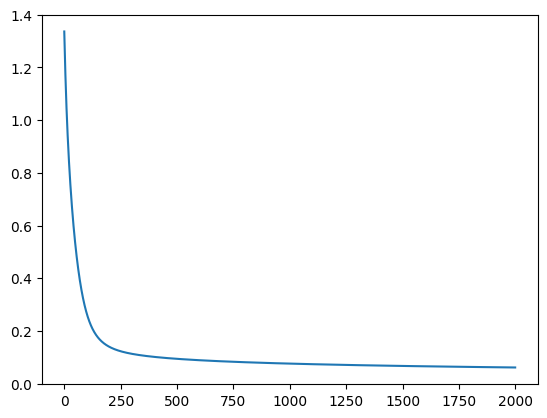

In [18]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train, w)

  e = bce(y_train, y_hat)
  error_hist.append(e)

  grads = gradient(x_train, y_train, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch}, \t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [19]:
#test
x_test = np.asarray(x_test)

x_test = np.hstack((np.ones((len(x_test), 1)), x_test))

print(x_test)

[[ 1.        3.6277    0.9829    0.68861   0.63403 ]
 [ 1.        3.4663    1.1112    1.7425    1.3388  ]
 [ 1.       -3.1366    0.42212   2.6225   -0.064238]
 ...
 [ 1.       -1.2576    1.5892    7.0078    0.42455 ]
 [ 1.        0.54777  10.3754   -1.5435   -4.1633  ]
 [ 1.       -2.1802    3.3791   -1.2256   -2.6621  ]]


In [20]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

In [23]:
w=[ 1.37176117, -1.49997671, -0.84507143, -0.95435874, -0.16937093]
w = np.array(w)
w = w.reshape(-1,1)

In [24]:
y_hat = logistic_regression(x_test,w)
accuracy(y_test, y_hat)

0.9927272727272727

In [25]:
#soale 4

normalized_df = (df - df.min())/(df.max()-df.min())
normalized_df

,Role,Type,Demographic,Description,Units
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


In [26]:
X1 = normalized_df.iloc[:,0:4]
y1 = normalized_df.iloc[:,-1]

In [27]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((1097, 4), (1097,), (275, 4), (275,))

In [28]:
x_train1 = np.asarray(x_train1)

x_train1 = np.hstack((np.ones((len(x_train1), 1)), x_train1))

y_train1 = np.array(y_train1)
y_train1 = y_train1.reshape(-1,1)

w = np.random.randn(5,1)

Epoch=99, 	 E=0.9084, 	 w=[ 0.59718878  0.46317036 -0.52560775 -0.52173486  0.99053745]
Epoch=199, 	 E=0.7531, 	 w=[ 0.37204168  0.261231   -0.69906825 -0.57332851  0.82483568]
Epoch=299, 	 E=0.6920, 	 w=[ 0.24802149  0.11546934 -0.81166801 -0.59691929  0.72694215]
Epoch=399, 	 E=0.6675, 	 w=[ 0.1885899   0.00614375 -0.8854418  -0.60278565  0.67279158]
Epoch=499, 	 E=0.6558, 	 w=[ 0.16720921 -0.08137771 -0.93622347 -0.59839359  0.64453201]
Epoch=599, 	 E=0.6484, 	 w=[ 0.16781031 -0.15601115 -0.97353183 -0.58827753  0.63125304]
Epoch=699, 	 E=0.6427, 	 w=[ 0.18107913 -0.22293518 -1.0028602  -0.5750717   0.62660266]
Epoch=799, 	 E=0.6376, 	 w=[ 0.20163903 -0.28514222 -1.02737354 -0.56029718  0.62690666]
Epoch=899, 	 E=0.6328, 	 w=[ 0.22637122 -0.3443704  -1.04890852 -0.54483404  0.63003256]
Epoch=999, 	 E=0.6281, 	 w=[ 0.2534571  -0.40163603 -1.06853951 -0.52919192  0.63473769]
Epoch=1099, 	 E=0.6235, 	 w=[ 0.28183228 -0.45753704 -1.08689974 -0.51366507  0.64029613]
Epoch=1199, 	 E=0.619

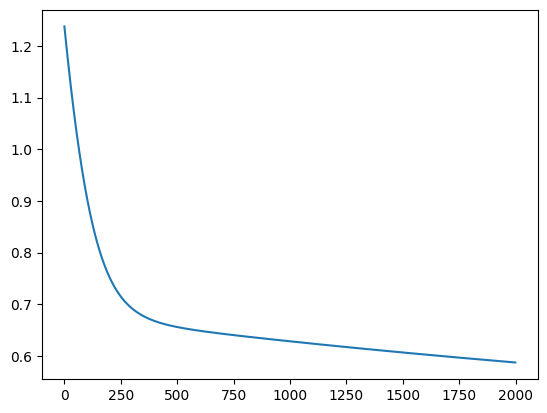

In [29]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train1, w)

  e = bce(y_train1, y_hat)
  error_hist.append(e)

  grads = gradient(x_train1, y_train1, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch}, \t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [30]:
w=[ 0.54361441, -0.92919742, -1.22702091, -0.39217451,  0.69396037]
w = np.array(w)
w = w.reshape(-1,1)

x_test1 = np.asarray(x_test1)
x_test1 = np.hstack((np.ones((len(x_test1), 1)), x_test1))

y_test1 = np.array(y_test1)
y_test1 = y_test1.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

y_hat = logistic_regression(x_test1,w)
accuracy(y_test1, y_hat)

0.7672727272727272

In [39]:
y_hat[:5]

array([[0.44783633],
       [0.55859103],
       [0.32711303],
       [0.46778033],
       [0.40046827]])

In [40]:
a = df[df['Units'] == 1]
b = df[df['Units'] == 0]

print(f'len a:{len(a)}')
print(f'len b:{len(b)}')

len a:610
len b:762


In [42]:
new_rows = pd.DataFrame()

for i in range(len(b)-len(a)):
  v= a.iloc[i:i+2, :-1].mean()

  new_row = v.append(pd.Series({'Units': 1}))
  new_rows = new_rows.append(new_row, ignore_index=True)


a.reset_index(drop=True, inplace=True)
new_rows.reset_index(drop=True, inplace=True)

updated_df = pd.concat([a.reset_index(drop=True), new_rows], ignore_index=True)

updated_df

<ipython-input-42-f9fd924fbc12>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = v.append(pd.Series({'Units': 1}))
<ipython-input-42-f9fd924fbc12>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)
<ipython-input-42-f9fd924fbc12>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = v.append(pd.Series({'Units': 1}))
<ipython-input-42-f9fd924fbc12>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)
<ipython-input-42-f9fd924fbc12>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas

,Role,Type,Demographic,Description,Units
0,-1.39710,3.31910,-1.392700,-1.994800,1.0
1,0.39012,-0.14279,-0.031994,0.350840,1.0
2,-1.66770,-7.15350,7.892900,0.967650,1.0
3,-3.84830,-12.80470,15.682400,-1.281000,1.0
4,-3.56810,-8.21300,10.083000,0.967650,1.0
...,...,...,...,...,...
757,-0.58961,-6.37235,4.711900,-0.308000,1.0
758,1.29199,-0.80495,-0.653650,0.551902,1.0
759,1.62945,2.94145,-3.827800,-1.954748,1.0
760,-1.49850,5.15040,-2.242640,-4.729100,1.0


In [43]:
combined_df = updated_df.append(b)

<ipython-input-43-ef999cc060b1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = updated_df.append(b)


In [44]:
combined_df

,Role,Type,Demographic,Description,Units
0,-1.39710,3.31910,-1.392700,-1.99480,1.0
1,0.39012,-0.14279,-0.031994,0.35084,1.0
2,-1.66770,-7.15350,7.892900,0.96765,1.0
3,-3.84830,-12.80470,15.682400,-1.28100,1.0
4,-3.56810,-8.21300,10.083000,0.96765,1.0
...,...,...,...,...,...
757,2.66060,3.16810,1.961900,0.18662,0.0
758,3.93100,1.85410,-0.023425,1.23140,0.0
759,0.01727,8.69300,1.398900,-3.96680,0.0
760,3.24140,0.40971,1.401500,1.19520,0.0


In [45]:
X2 = combined_df.iloc[:,0:4]
y2 = combined_df.iloc[:,-1]

In [46]:
x_train2,x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((1219, 4), (1219,), (305, 4), (305,))

In [47]:
x_train2 = np.asarray(x_train2)

x_train2 = np.hstack((np.ones((len(x_train2), 1)), x_train2))

print(x_train2)

[[ 1.       -1.9551   -6.9756    5.5383   -0.12889 ]
 [ 1.       -0.11716   0.60422  -0.38587  -0.059065]
 [ 1.       -0.87874  -2.2121   -0.051701  0.099985]
 ...
 [ 1.        4.6014    5.6264   -2.1235    0.19309 ]
 [ 1.        2.805     0.57732   1.3424    1.2133  ]
 [ 1.       -0.49948   1.7734   -2.2469   -0.68104 ]]


In [48]:
y_train2 = np.array(y_train2)
y_train2 = y_train2.reshape(-1,1)

Epoch=99, 	 E=0.1500, 	 w=[ 0.66887743 -1.20639387 -0.65976471 -0.71918477  0.27229334]
Epoch=199, 	 E=0.1064, 	 w=[ 0.74577001 -1.29448696 -0.60735847 -0.72173955  0.1210308 ]
Epoch=299, 	 E=0.0935, 	 w=[ 0.8038595  -1.34315069 -0.61135783 -0.72261111  0.03831944]
Epoch=399, 	 E=0.0866, 	 w=[ 0.85242247 -1.37656962 -0.62622871 -0.73281485 -0.0159332 ]
Epoch=499, 	 E=0.0821, 	 w=[ 0.89516053 -1.40247386 -0.64517986 -0.74787115 -0.05424171]
Epoch=599, 	 E=0.0785, 	 w=[ 0.93394587 -1.424172   -0.66547043 -0.76533542 -0.08261983]
Epoch=699, 	 E=0.0757, 	 w=[ 0.96984729 -1.44333341 -0.68582255 -0.78384842 -0.10439628]
Epoch=799, 	 E=0.0732, 	 w=[ 1.00352268 -1.46087619 -0.70563988 -0.80263838 -0.12156102]
Epoch=899, 	 E=0.0710, 	 w=[ 1.03540136 -1.47733211 -0.72466049 -0.82127038 -0.13537222]
Epoch=999, 	 E=0.0690, 	 w=[ 1.06577791 -1.49302039 -0.74278963 -0.83950631 -0.1466625 ]
Epoch=1099, 	 E=0.0672, 	 w=[ 1.09486361 -1.508138   -0.7600163  -0.85722356 -0.15600461]
Epoch=1199, 	 E=0.065

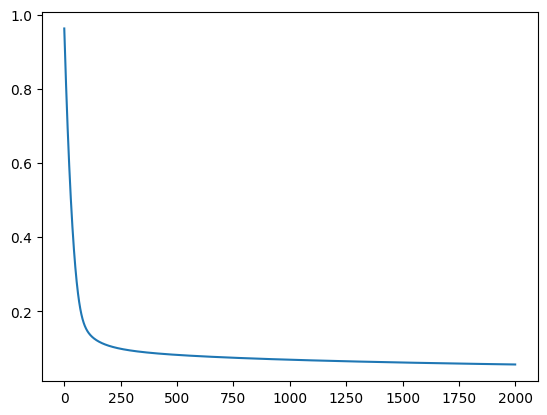

In [49]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train2, w)

  e = bce(y_train2, y_hat)
  error_hist.append(e)

  grads = gradient(x_train2, y_train2, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch}, \t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [50]:
#test
x_test2 = np.asarray(x_test2)

x_test2 = np.hstack((np.ones((len(x_test2), 1)), x_test2))

print(x_test2)

[[ 1.         1.0117     0.9022    -2.3506     0.42714  ]
 [ 1.        -4.2887    -7.8633    11.8387    -1.8978   ]
 [ 1.        -0.279285  -4.071295   3.684555   0.32886  ]
 ...
 [ 1.         3.9663    10.1684    -4.1131    -4.6056   ]
 [ 1.        -4.7462     3.1205     1.075     -1.2966   ]
 [ 1.        -1.2042     1.541585  -0.6566175 -1.368975 ]]


In [51]:
y_test2 = np.array(y_test2)
y_test2 = y_test2.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

In [52]:
w=[1.3163901,  -1.62990052, -0.88214326, -0.99184632, -0.19526835]
w = np.array(w)
w = w.reshape(-1,1)

In [53]:
y_hat = logistic_regression(x_test2,w)
accuracy(y_test2, y_hat)

0.9868852459016394

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [10]:
x_train3,x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(solver='sag', max_iter=200, random_state=83)
model.fit(x_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, random_state=83, solver='sag')

In [11]:
model.score(x_test3, y_test3)

0.9818181818181818

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

class_0 = df[df['Units'] == 0]
class_1 = df[df['Units'] == 1]

min_class_size = min(len(class_0), len(class_1))

balanced_class_0 = resample(class_0, replace=True, n_samples=min_class_size, random_state=83)
balanced_class_1 = resample(class_1, replace=True, n_samples=min_class_size, random_state=83)

balanced_df = pd.concat([balanced_class_0, balanced_class_1])

features = balanced_df.drop('Units', axis=1)
target = balanced_df['Units']

X_train4, X_test4, y_train4, y_test4 = train_test_split(features, target, test_size=0.2, random_state=83)

model = LogisticRegression(solver='sag', max_iter=200, random_state=83)
model.fit(X_train4, y_train4)

accuracy = model.score(X_test4, y_test4)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9918032786885246


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
